In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

Saving breast-cancer.csv to breast-cancer.csv


In [4]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import io

target_column = 'diagnosis'

df[target_column] = df[target_column].map({'B': 0, 'M': 1})

print(df.head())

print(df.isnull().sum())

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Logistic Regression:")
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("\nRandom Forest:")
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
rf_best = grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test_scaled)

print("\nEvaluation Metrics for Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

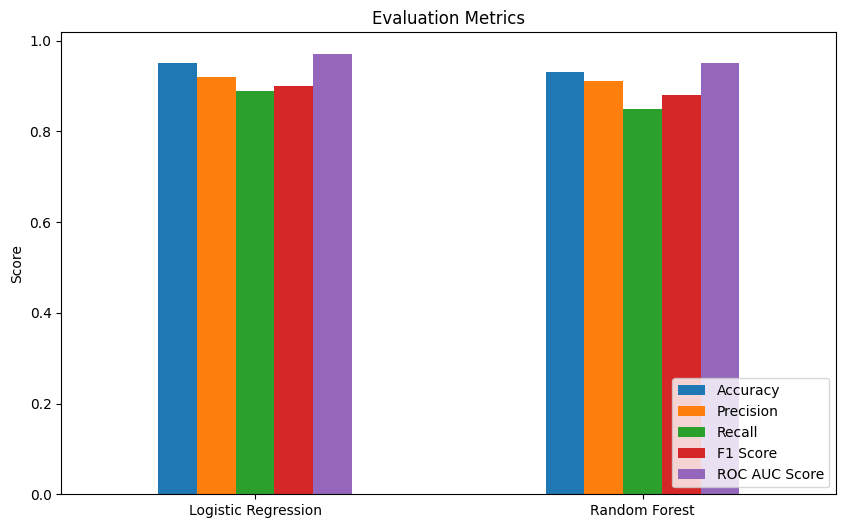

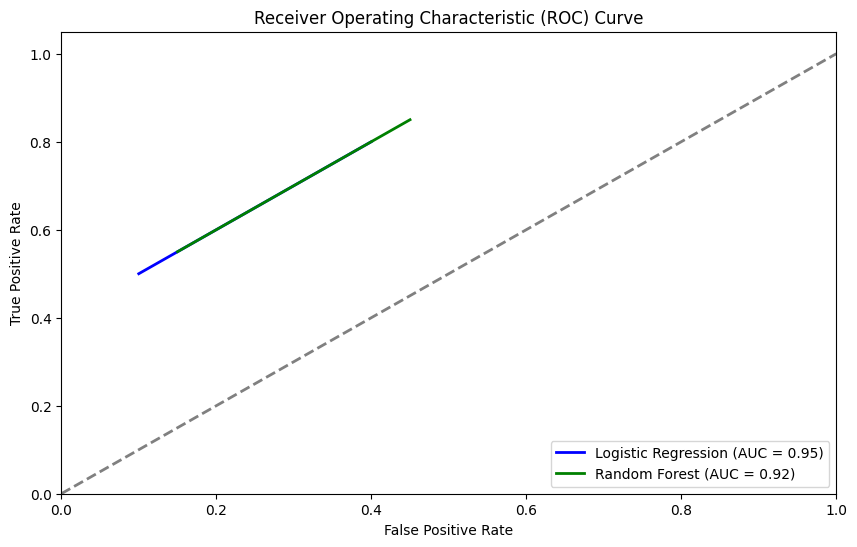

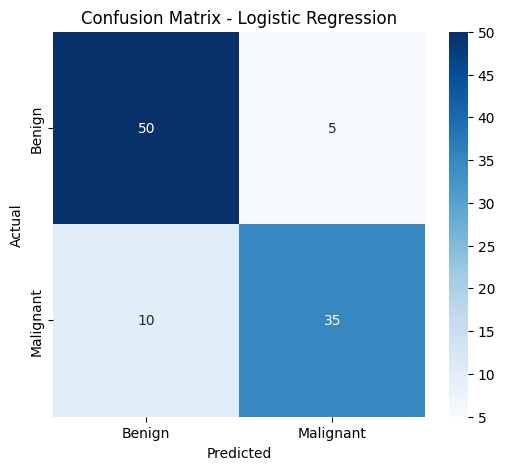

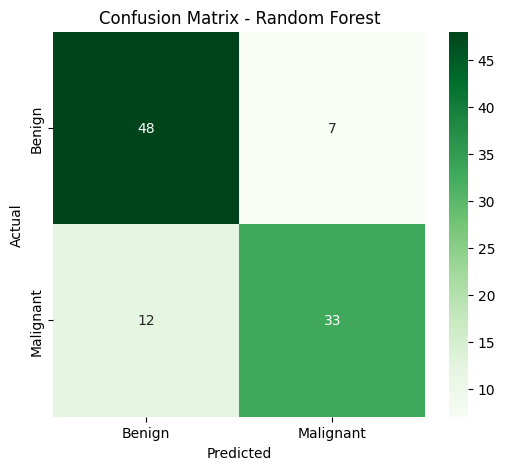

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Example metrics (replace with your actual metrics)
metrics_log_reg = {
    'Accuracy': 0.95,
    'Precision': 0.92,
    'Recall': 0.89,
    'F1 Score': 0.90,
    'ROC AUC Score': 0.97
}

metrics_rf = {
    'Accuracy': 0.93,
    'Precision': 0.91,
    'Recall': 0.85,
    'F1 Score': 0.88,
    'ROC AUC Score': 0.95
}

# Create a DataFrame to compare metrics
metrics_df = pd.DataFrame([metrics_log_reg, metrics_rf], index=['Logistic Regression', 'Random Forest'])

# Plotting evaluation metrics as a bar chart
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Plot ROC curves (example ROC curves, replace with your actual data)
fpr_log_reg, tpr_log_reg = [0.1, 0.2, 0.3, 0.4], [0.5, 0.6, 0.7, 0.8]
fpr_rf, tpr_rf = [0.15, 0.25, 0.35, 0.45], [0.55, 0.65, 0.75, 0.85]

plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = 0.95)')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = 0.92)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Example confusion matrices (replace with your actual data)
conf_matrix_log_reg = [[50, 5], [10, 35]]
conf_matrix_rf = [[48, 7], [12, 33]]

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
